## Loading Dataset

In [1]:
import pandas as pd

In [2]:
data_income = pd.read_csv("income.csv")

In [3]:
data = data_income.copy()

## Cleaning data and removing missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [5]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [6]:
data.describe(include= 'O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [7]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [8]:
import numpy as np

In [9]:
np.unique(data.JobType)

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [10]:
np.unique(data.EdType)

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [11]:
np.unique(data.maritalstatus)

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

In [12]:
np.unique(data.occupation)

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [13]:
np.unique(data.relationship)

array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife'], dtype=object)

In [14]:
np.unique(data.race)

array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'], dtype=object)

In [15]:
np.unique(data.gender)

array([' Female', ' Male'], dtype=object)

In [16]:
np.unique(data.nativecountry)

array([' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia'], dtype=object)

In [17]:
np.unique(data.SalStat)

array([' greater than 50,000', ' less than or equal to 50,000'],
      dtype=object)

## reloading data as there are ? which has to be set null

In [18]:
data = pd.read_csv("income.csv", na_values= [' ?'])

In [19]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [20]:
data.loc[data.JobType.isnull()]

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [21]:
data.loc[data.occupation.isnull() & ~data.JobType.isnull()]

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
4825,18,Never-worked,10th,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
10215,23,Never-worked,7th-8th,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
14073,17,Never-worked,10th,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,"less than or equal to 50,000"
19542,18,Never-worked,11th,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,"less than or equal to 50,000"
22385,20,Never-worked,Some-college,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,"less than or equal to 50,000"
31296,30,Never-worked,HS-grad,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
31305,18,Never-worked,Some-college,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,"less than or equal to 50,000"


In [22]:
data = data.dropna()

In [23]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   JobType        30162 non-null  object
 2   EdType         30162 non-null  object
 3   maritalstatus  30162 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   30162 non-null  object
 6   race           30162 non-null  object
 7   gender         30162 non-null  object
 8   capitalgain    30162 non-null  int64 
 9   capitalloss    30162 non-null  int64 
 10  hoursperweek   30162 non-null  int64 
 11  nativecountry  30162 non-null  object
 12  SalStat        30162 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [25]:
data2 = data.copy()

## Relationship between independent variable

In [26]:
correlation = data.corr(numeric_only= True)

In [27]:
correlation     #there is very littel correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [28]:
pd.crosstab(
    index= data.gender,
    columns= 'Frequency'
)

col_0,Frequency
gender,
Female,9782
Male,20380


In [29]:
pd.crosstab(
    index= data.gender,
    columns= 'Percentage',
    normalize= True
)

col_0,Percentage
gender,
Female,0.324315
Male,0.675685


In [30]:
pd.crosstab(
    index= data.gender,
    columns= data.SalStat,
    margins= True,
    normalize= 'index'
)

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='SalStat', ylabel='count'>

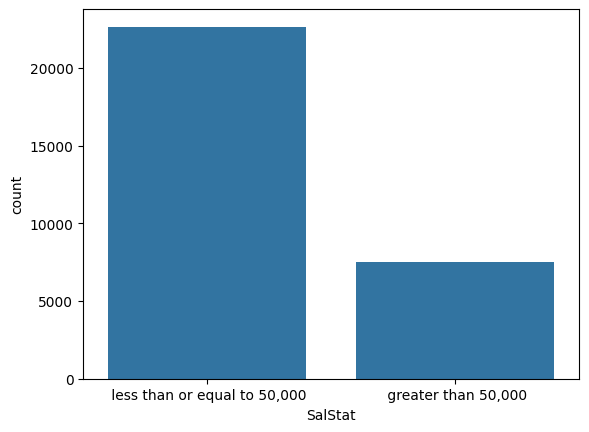

In [32]:
sns.countplot(x = data.SalStat)

<Axes: xlabel='age', ylabel='Count'>

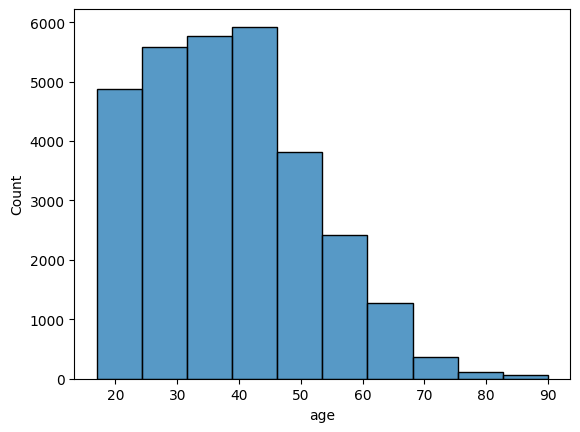

In [33]:
sns.histplot(data.age, bins= 10)

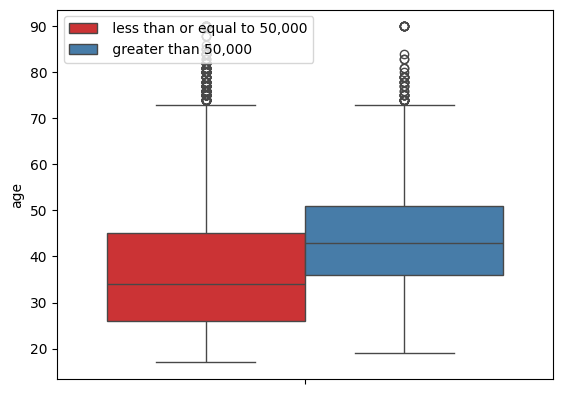

In [34]:
sns.boxplot(data= data, hue= "SalStat", y= "age", palette= 'Set1')
plt.legend(loc= 'upper left')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ' Private'),
  Text(1, 0, ' Federal-gov'),
  Text(2, 0, ' Self-emp-inc'),
  Text(3, 0, ' Self-emp-not-inc'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' State-gov'),
  Text(6, 0, ' Without-pay')])

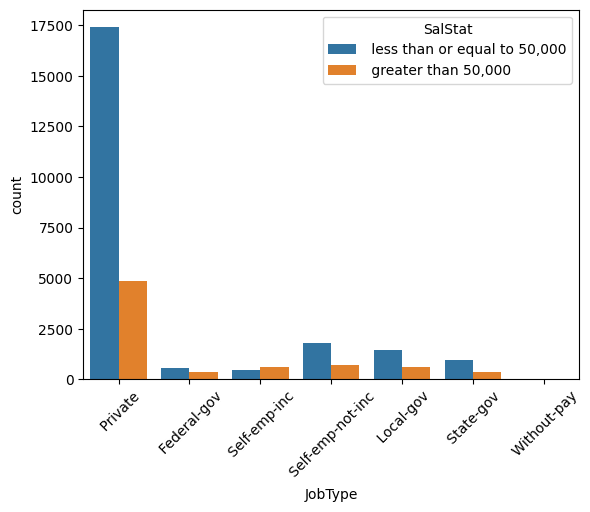

In [35]:
sns.countplot(data= data, x= "JobType", hue= "SalStat")
plt.xticks(rotation= 45)

In [36]:
pd.crosstab(
    index= data.JobType,
    columns= data.SalStat,
    normalize= 'index',
    margins= True
)

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,0.387063,0.612937
Local-gov,0.294630,0.705370
Private,0.218792,0.781208
Self-emp-inc,0.558659,0.441341
Self-emp-not-inc,0.285714,0.714286
State-gov,0.268960,0.731040
Without-pay,0.000000,1.000000
All,0.248922,0.751078


<Axes: xlabel='count', ylabel='EdType'>

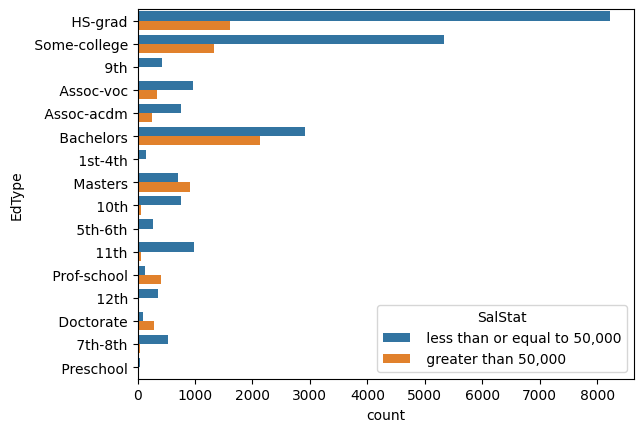

In [37]:
sns.countplot(data= data, y= 'EdType', hue= 'SalStat')

In [38]:
pd.crosstab(
    index= data.EdType,
    columns= data.SalStat,
    normalize= 'index',
    margins= True
)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,0.071951,0.928049
11th,0.056298,0.943702
12th,0.076923,0.923077
1st-4th,0.039735,0.960265
5th-6th,0.041667,0.958333
7th-8th,0.062837,0.937163
9th,0.054945,0.945055
Assoc-acdm,0.253968,0.746032
Assoc-voc,0.263198,0.736802


<Axes: xlabel='count', ylabel='occupation'>

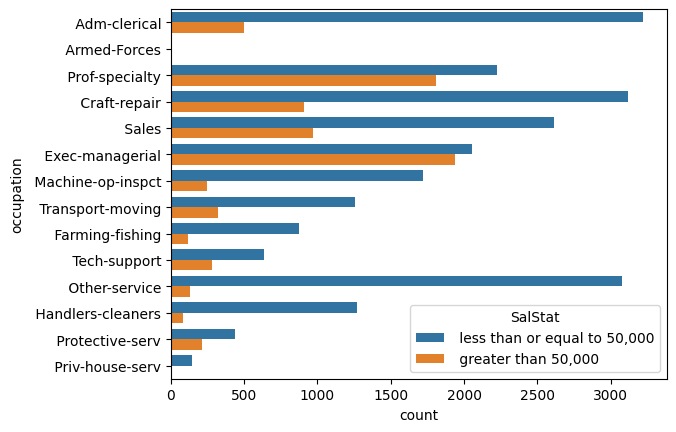

In [39]:
sns.countplot(data= data, y= 'occupation', hue= 'SalStat')

In [40]:
pd.crosstab(
    index= data.occupation,
    columns= data.SalStat,
    normalize= 'index',
    margins= True
)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,0.133835,0.866165
Armed-Forces,0.111111,0.888889
Craft-repair,0.225310,0.774690
Exec-managerial,0.485220,0.514780
Farming-fishing,0.116279,0.883721
Handlers-cleaners,0.061481,0.938519
Machine-op-inspct,0.124619,0.875381
Other-service,0.041096,0.958904
Priv-house-serv,0.006993,0.993007


<Axes: xlabel='capitalgain', ylabel='Count'>

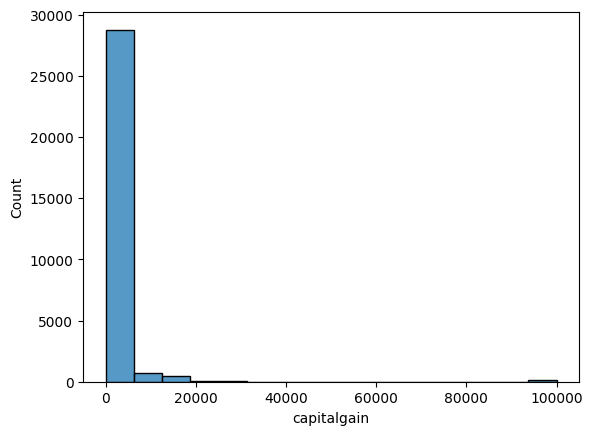

In [41]:
sns.histplot(data.capitalgain)

<Axes: xlabel='capitalloss', ylabel='Count'>

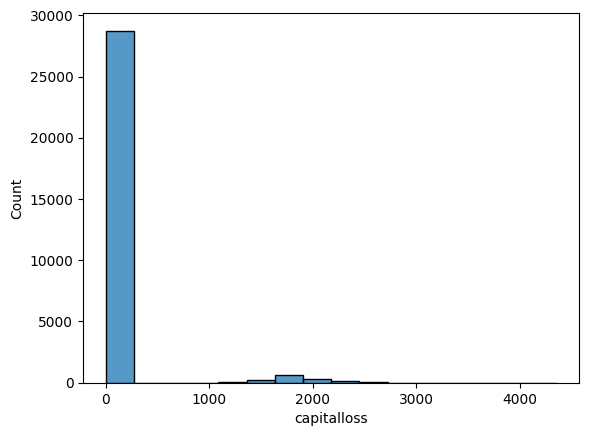

In [42]:
sns.histplot(data.capitalloss)

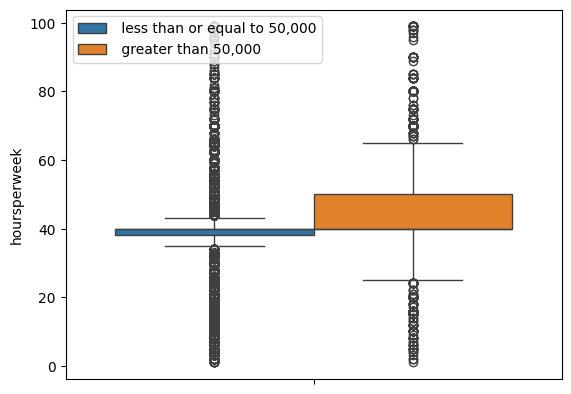

In [43]:
sns.boxplot(data= data, hue= 'SalStat', y= 'hoursperweek')
plt.legend(loc= 'upper left')

## Converting data to integers for model training

In [44]:
data.SalStat = data.SalStat.map(
    {
        " greater than 50,000": 1,
        " less than or equal to 50,000": 0
    }
)

In [45]:
data.SalStat

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [46]:
data = pd.get_dummies(data, drop_first= True).astype('int64')

In [47]:
data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
features = list(data.columns)
features.remove("SalStat")
features

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty

## Splitting train test

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x = data.loc[:, features]
y = data.loc[:, 'SalStat']

In [51]:
x

,age,capitalgain,capitalloss,hoursperweek,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,JobType_ Without-pay,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
y

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [54]:
x_train, x_test, y_train, y_test

(       age  capitalgain  capitalloss  hoursperweek  JobType_ Local-gov  \
 1408    42            0            0            60                   0   
 27598   27            0            0            40                   0   
 19755   36            0            0            35                   1   
 6713    54            0            0            40                   0   
 31703   44            0            0            40                   0   
 ...    ...          ...          ...           ...                 ...   
 27013   35            0            0            40                   0   
 27396   31            0            0            30                   0   
 4170    28            0            0            40                   0   
 6652    29            0            0            40                   0   
 11434   26            0            0            30                   0   
 
        JobType_ Private  JobType_ Self-emp-inc  JobType_ Self-emp-not-inc  \
 1408               

## Model

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
clf = LogisticRegression(tol= 0.1)

In [57]:
clf.fit(x_train, y_train)

LogisticRegression(tol=0.1)

In [58]:
clf.coef_

array([[-5.25229165e-03,  3.42571369e-04,  7.88348412e-04,
        -2.52419449e-02,  7.70317727e-05, -3.68782853e-03,
         5.25995742e-04,  2.30967851e-05, -4.52986410e-05,
        -7.71015648e-06, -5.61410672e-04, -1.88930773e-04,
        -7.72664575e-05, -1.47555411e-04, -2.30693735e-04,
        -1.96397504e-04, -7.48978882e-05, -7.72622000e-05,
         1.14043368e-03,  3.40814195e-04, -2.35217997e-03,
         8.04159993e-04, -2.53057648e-05,  4.23411904e-04,
        -1.34344321e-03,  1.52030064e-05,  4.81075876e-03,
        -1.43175840e-04, -5.40046355e-03, -4.15512333e-04,
        -2.72234836e-04, -3.25786081e-06, -4.85144664e-04,
         1.46559125e-03, -3.03667735e-04, -6.71460358e-04,
        -6.36239716e-04, -1.75291518e-03, -8.47937876e-05,
         1.11455256e-03,  5.45789710e-05, -2.13923500e-04,
         4.62571051e-05, -2.10179605e-04, -2.93775182e-03,
        -4.70738636e-04, -2.93508910e-03, -1.44830921e-03,
         5.25255166e-04, -5.66707679e-05, -9.36843109e-0

In [59]:
clf.intercept_

array([-0.00290842])

In [60]:
prediction = clf.predict(x_test)

In [61]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [63]:
confusion_matrix(y_test, prediction)

array([[5419,  205],
       [1384,  533]], dtype=int64)

In [64]:
precision_score(y_test, prediction)

0.7222222222222222

In [65]:
recall_score(y_test, prediction)

0.27803860198226393

In [66]:
f1_score(y_test, prediction)

0.4015065913370998

In [67]:
accuracy_score(y_test, prediction)

0.7892852406842594

## Model after removing insignificant variables

In [68]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [69]:
data2.SalStat = data2.SalStat.map(
    {
        " greater than 50,000": 1,
        " less than or equal to 50,000": 0
    }
)

In [70]:
data2 = data2.drop(['gender', 'nativecountry', 'race', 'JobType'], axis= 1)

In [71]:
data2

,age,EdType,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,SalStat
0,45,HS-grad,Divorced,Adm-clerical,Not-in-family,0,0,28,0
1,24,HS-grad,Never-married,Armed-Forces,Own-child,0,0,40,0
2,44,Some-college,Married-civ-spouse,Prof-specialty,Husband,0,0,40,1
3,27,9th,Never-married,Craft-repair,Other-relative,0,0,40,0
4,20,Some-college,Never-married,Sales,Not-in-family,0,0,35,0
...,...,...,...,...,...,...,...,...,...
31973,34,HS-grad,Never-married,Farming-fishing,Not-in-family,594,0,60,0
31974,34,Some-college,Never-married,Protective-serv,Not-in-family,0,0,40,0
31975,23,Some-college,Married-civ-spouse,Adm-clerical,Husband,0,0,40,0
31976,42,Some-college,Married-civ-spouse,Adm-clerical,Wife,0,0,40,0


In [72]:
data2 = pd.get_dummies(data2).astype('int64')

In [73]:
data2

,age,capitalgain,capitalloss,hoursperweek,SalStat,EdType_ 10th,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,45,0,0,28,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,27,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,20,0,0,35,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31974,34,0,0,40,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
31975,23,0,0,40,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31976,42,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
features = list(data2.columns)
features.remove("SalStat")
features

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'EdType_ 10th',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Divorced',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tec

## Spliting train test

In [75]:
x = data2.loc[:, features]
y = data2.loc[:, 'SalStat']

In [76]:
x

,age,capitalgain,capitalloss,hoursperweek,EdType_ 10th,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,45,0,0,28,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,27,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,20,0,0,35,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31974,34,0,0,40,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
31975,23,0,0,40,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31976,42,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
y

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [79]:
x_train, x_test, y_train, y_test 

(       age  capitalgain  capitalloss  hoursperweek  EdType_ 10th  \
 17625   33            0            0            40             1   
 22425   22            0            0            32             0   
 10124   22            0            0            40             0   
 2975    18            0            0            35             0   
 9793    51            0            0            40             0   
 ...    ...          ...          ...           ...           ...   
 16065   42            0            0            22             0   
 13729   42         3325            0            40             0   
 26259   35            0            0            40             0   
 5183    45        14344            0            48             0   
 3986    39            0            0            60             0   
 
        EdType_ 11th  EdType_ 12th  EdType_ 1st-4th  EdType_ 5th-6th  \
 17625             0             0                0                0   
 22425             0      

## Model with reduced features

In [80]:
clf2 = LogisticRegression(tol= 0.1)

In [81]:
clf2.fit(x_train, y_train)

LogisticRegression(tol=0.1)

In [82]:
prediction = clf2.predict(x_test)

In [83]:
prediction

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
clf2.coef_

array([[-2.02555714e-02,  3.28733467e-04,  7.06559832e-04,
        -1.36715885e-02, -6.68616505e-02, -1.04582298e-01,
        -3.50802632e-02, -1.21159717e-02, -2.61437037e-02,
        -4.59184439e-02, -3.81735615e-02, -1.45956279e-02,
        -1.19433982e-02,  2.44077693e-01,  6.54446224e-02,
        -4.29523812e-01,  1.60608515e-01, -5.26217830e-03,
         7.70363535e-02, -2.23860812e-01, -2.74067434e-01,
         2.20863747e-03,  9.37502321e-01, -2.60729829e-02,
        -9.72972631e-01, -7.27875310e-02, -6.07049162e-02,
        -2.23071294e-01, -6.11930799e-04, -7.49879696e-02,
         2.88717172e-01, -5.78259831e-02, -1.19930209e-01,
        -1.14928981e-01, -3.18185266e-01, -1.63905873e-02,
         2.19834183e-01,  1.47027866e-02, -3.26203434e-02,
         4.50712474e-03, -3.61032405e-02,  8.41835378e-01,
        -5.40096511e-01, -8.57156331e-02, -5.28224217e-01,
        -2.61648795e-01,  1.06955240e-01]])

In [85]:
clf2.intercept_

array([-0.46689582])

In [86]:
accuracy_score(y_test, prediction)

0.8150112717146267

In [87]:
precision_score(y_test, prediction)

0.6782675947409126

In [88]:
recall_score(y_test, prediction)

0.47252155172413796

In [89]:
f1_score(y_test, prediction)

0.5570022229279136

In [90]:
confusion_matrix(y_test, prediction)

array([[5269,  416],
       [ 979,  877]], dtype=int64)

## KNN model

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
clf3 = KNeighborsClassifier()

In [93]:
clf3.fit(x_train, y_train)

KNeighborsClassifier()

In [94]:
prediction = clf3.predict(x_test)

In [95]:
prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [96]:
accuracy_score(y_test, prediction)

0.8423286036334704

In [97]:
precision_score(y_test, prediction)

0.7017543859649122

In [98]:
recall_score(y_test, prediction)

0.625

In [99]:
f1_score(y_test, prediction)

0.6611570247933884

In [100]:
confusion_matrix(y_test, prediction)

array([[5192,  493],
       [ 696, 1160]], dtype=int64)

## Calculating error for k values between 1 and 20

In [103]:
misclassified_sample = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train, y_train)
    prediciton = knn.predict(x_test)
    misclassified_sample.append((y_test == prediction).sum())

In [104]:
misclassified_sample

[6352,
 6352,
 6352,
 6352,
 6352,
 6352,
 6352,
 6352,
 6352,
 6352,
 6352,
 6352,
 6352,
 6352,
 6352,
 6352,
 6352,
 6352,
 6352,
 6352]